In [62]:
import cv2
import os
import glob
import numpy as np
import pandas as pd
import imageio
import matplotlib.pyplot as plt


In [63]:
 pip install pillow


Note: you may need to restart the kernel to use updated packages.


In [64]:
mura_Dir = "MURA-v1.1/"
train_imgs_path=pd.read_csv(mura_Dir+'train_image_paths.csv',names=["Train Dataset"])
train_labels=pd.read_csv(mura_Dir+'train_labeled_studies.csv',names=["Train Labeled Studies","label"])
test_imgs_path=pd.read_csv(mura_Dir+'valid_image_paths.csv',names=["Test Dataset"])
test_labels=pd.read_csv(mura_Dir+'valid_labeled_studies.csv',names=["Test Labeled Studies","labels"])



In [65]:
train_imgs_path=train_imgs_path.sort_values(by=['Train Dataset'])
train_labels=train_labels.sort_values(by=['Train Labeled Studies'])
test_imgs_path=test_imgs_path.sort_values(by=['Test Dataset'])
test_labels=test_labels.sort_values(by=['Test Labeled Studies'])

In [66]:
def fileImagesOfStudy(path):
    img_dir = path # Enter Directory of all images 
    data_path = os.path.join(img_dir,'*g')
    files = glob.glob(data_path)
    data = []
    i=0
    for f1 in files:
        i=i+1
        img = cv2.imread(f1)
        data.append(img)
        
    return data

In [114]:

test_labels['Body Part']=test_labels['Test Labeled Studies'].apply(lambda x: str(x.split('/')[2])[3:])
test_labels['Study Type']=test_labels['Test Labeled Studies'].apply(lambda x: str(x.split('/')[4])[:6])

In [115]:
train_labels['Body Part']=train_labels['Train Labeled Studies'].apply(lambda x: str(x.split('/')[2])[3:])
train_labels['Study Type']=train_labels['Train Labeled Studies'].apply(lambda x: str(x.split('/')[4])[:6])

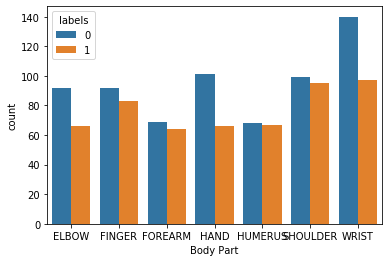

In [119]:
import seaborn as sns
sns.countplot(data=test_labels,x='Body Part',hue='labels')


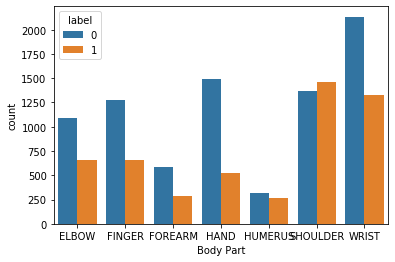

In [120]:
sns.countplot(data=train_labels,x='Body Part',hue='label')

In [103]:
import matplotlib.pyplot as plt
import numpy as np

def show_images(images, cols = 1, titles = None):
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()

In [105]:
x=len(test_imgs_path_numpy_spervised_label_One)

In [106]:
trainD=[]
for d in range(0,x):
    f=train_imgs_path_numpy_spervised_label_Zero[d]
    data=fileImagesOfStudy(f)
    trainD.append(data)


array(['MURA-v1.1/valid/XR_ELBOW/patient11186/study1_positive/',
       'MURA-v1.1/valid/XR_ELBOW/patient11189/study1_positive/',
       'MURA-v1.1/valid/XR_ELBOW/patient11236/study1_positive/',
       'MURA-v1.1/valid/XR_ELBOW/patient11264/study1_positive/',
       'MURA-v1.1/valid/XR_ELBOW/patient11312/study1_positive/',
       'MURA-v1.1/valid/XR_ELBOW/patient11326/study1_positive/',
       'MURA-v1.1/valid/XR_ELBOW/patient11342/study1_positive/',
       'MURA-v1.1/valid/XR_ELBOW/patient11358/study1_positive/',
       'MURA-v1.1/valid/XR_ELBOW/patient11389/study1_positive/',
       'MURA-v1.1/valid/XR_ELBOW/patient11390/study1_positive/',
       'MURA-v1.1/valid/XR_ELBOW/patient11414/study1_positive/',
       'MURA-v1.1/valid/XR_ELBOW/patient11417/study1_positive/',
       'MURA-v1.1/valid/XR_ELBOW/patient11417/study2_positive/',
       'MURA-v1.1/valid/XR_ELBOW/patient11421/study1_positive/',
       'MURA-v1.1/valid/XR_ELBOW/patient11430/study1_positive/',
       'MURA-v1.1/valid/X

In [108]:
data=trainD[66]


In [109]:

img=data[1]

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape


(512, 406)

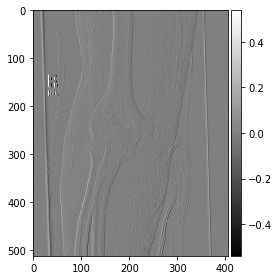

In [110]:


import numpy as np
from skimage.io import imread, imshow
from skimage.filters import prewitt_h,prewitt_v
import matplotlib.pyplot as plt
%matplotlib inline
#calculating horizontal edges using prewitt kernel
edges_prewitt_horizontal = prewitt_h(gray)
#calculating vertical edges using prewitt kernel
edges_prewitt_vertical = prewitt_v(gray)
imshow(edges_prewitt_vertical, cmap='gray')

In [111]:
edges_prewitt_vertical.shape

(512, 406)

install Keras

In [142]:

import os
import numpy as np
import pandas as pd
import cv2
import tensorflow as tf
from tqdm import tqdm_notebook 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import itertools
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, concatenate, Input, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam, Adadelta
from keras.layers.advanced_activations import LeakyReLU
from keras.utils.np_utils import to_categorical

In [148]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(150,150,3),include_top=False,weights='imagenet')


In [149]:
base_model.summary()


Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 151, 151, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 75, 75, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 75, 75, 32)   128         Conv1[0][0]                      
_______________________________________________________________________________

In [145]:
base_model.trainable = False


In [146]:
model = tf.keras.Sequential([base_model])
model.add(Flatten())
